In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize

## Quantum Teleportation 
Alice wants to send an arbitrary quantum state (green) to her friend Bob using an entangled state they both share (violet-yellow).

![qtel](Figures/qtel.png)

##### Step 0: Prepare a random state

Prepare a random qubit using `random_statevector` and `seed=42`, and plot it on a bloch sphere.

In [3]:
psi = random_statevector(2, seed=42)
plot_bloch_multivector(psi)

Initialize the state as instruction using `Initialize`.

In [4]:
init_gate = Initialize(psi)
init_gate.label = 'init'

##### Step 1: Set up the quantum circuit for teleportation

We need 3 qubits: q0, q1 (Alice's qubits) and q2 (Bob's qubit) 

In [5]:
qr = QuantumRegister(3, name='q')
crx = ClassicalRegister(1, name='crx')
crz = ClassicalRegister(1, name='crz')
circuit = QuantumCircuit(qr, crz, crx)

Append the `init_gate` at position `[0]`.

In [6]:
circuit.append(init_gate, [0])
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

##### Step 2: Create the entanglement between q1 and q2

Add the required gates to the circuit discussed during the lecture

In [7]:
circuit.h(1)
circuit.cx(1, 2)
circuit.barrier()
circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚ñë            ‚ñë 
  q_0: ‚î§ init(0.18817+0.46343j,-0.64223+0.58083j) ‚îú‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ
       ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚ñë ‚îå‚îÄ‚îÄ‚îÄ‚îê      ‚ñë 
  q_1: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚ñë‚îÄ
                                                    ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê ‚ñë 
  q_2: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚ñë‚îÄ
                                                    ‚ñë      ‚îî‚îÄ‚îÄ‚îÄ‚îò ‚ñë 
crz: 1/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
                                                                   
crx: 1/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

##### Step 3: Perform the Bell measurement 

Alice now performs the most essential operations on her qubits (q0 and q1): the Bell measurement ‚ùóÔ∏è

In [8]:
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.barrier()
circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚ñë            ‚ñë      ‚îå‚îÄ‚îÄ‚îÄ‚îê¬ª
  q_0: ‚î§ init(0.18817+0.46343j,-0.64223+0.58083j) ‚îú‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ H ‚îú¬ª
       ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚ñë ‚îå‚îÄ‚îÄ‚îÄ‚îê      ‚ñë ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò¬ª
  q_1: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
                                                    ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îò     ¬ª
  q_2: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
                                                    ‚ñë      ‚îî‚îÄ‚îÄ‚îÄ‚îò ‚ñë           ¬ª
crz: 1/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê¬ª
                                                                             ¬ª
crx: 1/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê¬ª
                                                                             ¬ª
¬´        ‚ñë ‚îå‚îÄ‚îê    ‚ñë 
¬´  q_0: ‚îÄ‚ñë‚îÄ‚î§M‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ
¬´        ‚ñë ‚îî‚ï•‚îò‚îå‚îÄ‚îê ‚ñë 
¬´  q_1: ‚îÄ‚ñë‚îÄ‚îÄ‚ï´‚îÄ‚î§M‚îú‚îÄ‚ñë‚îÄ
¬´        ‚ñë  ‚ïë ‚îî‚ï•‚îò ‚ñë 
¬´  q_2: ‚îÄ‚ñë‚îÄ‚îÄ‚ï´‚îÄ‚îÄ‚ï´‚îÄ‚îÄ‚ñë‚îÄ
¬´        ‚ñë  ‚ïë  ‚ïë  ‚ñë 
¬´crz: 1/‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê‚ïê‚ï¨‚ïê‚ïê‚ïê‚ïê
¬´           0  ‚ïë    
¬´crx: 1/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê‚ïê‚ïê‚ïê
¬´              0

##### Step 4: Apply controlled operations on Bob's qubit 

Depending on the measurement outcomes (you already know them because you know which gates you applied on Alice's side üòâ)

In [9]:
circuit.x(2).c_if(crx, 1)
circuit.z(2).c_if(crz, 1)
circuit.draw()

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê ‚ñë            ‚ñë      ‚îå‚îÄ‚îÄ‚îÄ‚îê¬ª
  q_0: ‚î§ init(0.18817+0.46343j,-0.64223+0.58083j) ‚îú‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚î§ H ‚îú¬ª
       ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò ‚ñë ‚îå‚îÄ‚îÄ‚îÄ‚îê      ‚ñë ‚îå‚îÄ‚î¥‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îò¬ª
  q_1: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ H ‚îú‚îÄ‚îÄ‚ñ†‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
                                                    ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îò‚îå‚îÄ‚î¥‚îÄ‚îê ‚ñë ‚îî‚îÄ‚îÄ‚îÄ‚îò     ¬ª
  q_2: ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ¬ª
                                                    ‚ñë      ‚îî‚îÄ‚îÄ‚îÄ‚îò ‚ñë           ¬ª
crz: 1/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê¬ª
                                                                             ¬ª
crx: 1/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê¬ª
                                                                             ¬ª
¬´        ‚ñë ‚îå‚îÄ‚îê    ‚ñë               
¬´  q_0: ‚îÄ‚ñë‚îÄ‚î§M‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
¬´        ‚ñë ‚îî‚ï•‚îò‚îå‚îÄ‚îê ‚ñë               
¬´  q_1: ‚îÄ‚ñë‚îÄ‚îÄ‚ï´‚îÄ‚î§M‚îú‚îÄ‚ñë‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
¬´        ‚ñë  ‚ïë ‚îî‚ï•‚îò ‚ñë  ‚îå‚îÄ‚îÄ‚îÄ‚îê  ‚îå‚îÄ‚îÄ‚îÄ‚îê 
¬´  q_2: ‚îÄ‚ñë‚îÄ‚îÄ‚ï´‚îÄ‚îÄ‚ï´‚îÄ‚îÄ‚ñë‚îÄ‚îÄ‚î§ X ‚îú‚îÄ‚îÄ‚î§ Z ‚îú‚îÄ
¬´        ‚ñë  ‚ïë  ‚ïë  ‚ñë  ‚îî‚îÄ‚ï•‚îÄ‚îò  ‚îî‚îÄ‚ï•‚îÄ‚îò 
¬´           ‚ïë  ‚ïë       ‚ïë   ‚îå‚îÄ‚îÄ‚ï®‚îÄ‚îÄ‚îê
¬´crz: 1/‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê‚ïê‚ï¨‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï¨‚ïê‚ïê‚ïê‚ï° 0x1 ‚ïû
¬´           0  ‚ïë    ‚îå‚îÄ‚îÄ‚ï®‚îÄ‚îÄ‚îê‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò
¬´crx: 1/‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï©‚ïê‚ïê‚ïê‚ïê‚ï° 0x1 ‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê
¬´              0    ‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

##### Step 5: Run the circuit on the Aer backend 
 
Transpile the circuit for the Aer backend to run it using 'statevector_simulator'.

In [10]:
backend = Aer.get_backend('statevector_simulator')
mapped_circuit = transpile(circuit, backend)


job = backend.run(mapped_circuit)
result = job.result()
statevector= result.get_statevector()
counts = result.get_counts(mapped_circuit)

##### Step 6: Plot the results

Plot the results using a histogram

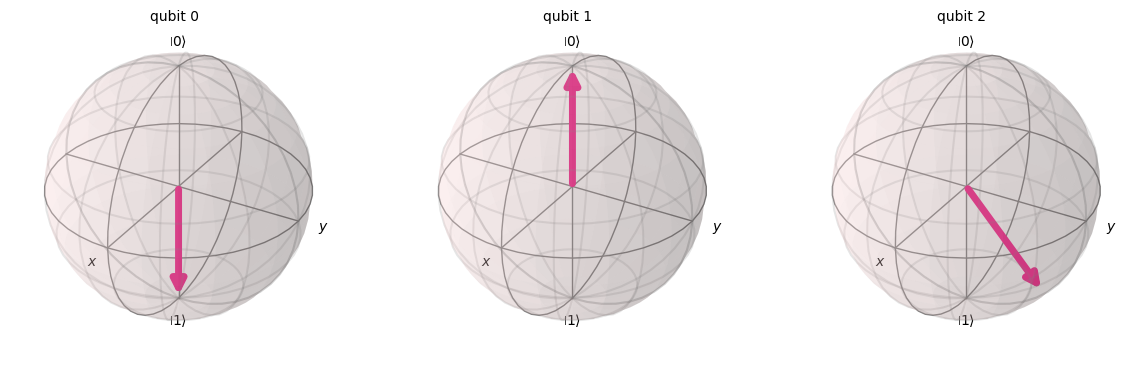

In [11]:
plot_bloch_multivector(statevector)